In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#Para no presentar los datos en notacion cientifica, rendondeamos
pd.set_option('display.float_format', '{:.3f}'.format)

In [69]:
# Leer los archivos de Excel y convertir las columnas a minúsculas

# Archivo con datos agrícolas mensuales por región
archivo_datos_agricolas = 'datos_mensuales_por_region (1).xlsx'
datos_region_mes = pd.read_excel(archivo_datos_agricolas, sheet_name='Sheet1')
datos_region_mes.columns = datos_region_mes.columns.str.lower()

# Archivo con datos climáticos mensuales
archivo_datos_climaticos = 'climate_data.xlsx'
datos_climaticos = pd.read_excel(archivo_datos_climaticos, sheet_name='Sheet1')
datos_climaticos.columns = datos_climaticos.columns.str.lower()

# Mostrar las primeras filas de ambos DataFrames para confirmar la correcta carga de datos
datos_region_mes.head(),

,year,region,month,siembra_mensual,cosecha_mensual,produccion_mensual
0,2011,NORTE,1,2501.129,12431.334,26614.790
1,2011,NORTE,2,1961.988,12744.351,34669.848
2,2011,NORTE,3,1509.372,12400.418,34128.766
3,2011,NORTE,4,1623.434,12514.195,31215.194
4,2011,NORTE,5,2551.450,12882.164,34097.820


In [70]:
datos_climaticos.head()

,year,month,region,provincia,precipitation,max_temp,min_temp,humidity
0,2011,1,SUR,Azua,48.820,26.280,12.810,78.340
1,2011,1,SUROESTE,Baoruco,27.410,28.020,14.100,73.120
2,2011,1,SUROESTE,Barahona,29.490,28.770,16.380,78.020
3,2011,1,NOROESTE,Dajabon,47.380,28.880,15.920,75.380
4,2011,1,CENTRAL,Santo Domingo,62.340,29.190,17.900,79.250


In [73]:
# Primero, aseguremos que las columnas relevantes tienen el mismo nombre para facilitar la combinación
# Renombrar las columnas si es necesario

datos_agricolas_region = datos_region_mes.rename(columns={'YEAR': 'year', 'MONTH': 'month', 'REGION': 'region'})
datos_climaticos = datos_climaticos.rename(columns={'year': 'year', 'month': 'month', 'region': 'region'})

# Unir los dos dataframes en función de las columnas comunes 'year', 'month' y 'region'
datos_combinados = pd.merge(datos_agricolas_region, datos_climaticos, on=['year', 'month', 'region'], how='inner')



In [79]:
datos_combinados.head()

,year,region,month,siembra_mensual,cosecha_mensual,produccion_mensual,provincia,precipitation,max_temp,min_temp,humidity
0,2011,NORTE,1,2501.129,12431.334,26614.790,Puerto Plata,115.970,28.190,17.150,79.500
1,2011,NORTE,1,2501.129,12431.334,26614.790,Santiago,76.930,26.180,13.460,77.810
2,2011,NORTE,2,1961.988,12744.351,34669.848,Puerto Plata,117.130,28.370,17.720,77.360
3,2011,NORTE,2,1961.988,12744.351,34669.848,Santiago,93.270,26.290,14.140,75.720
4,2011,NORTE,3,1509.372,12400.418,34128.766,Puerto Plata,102.410,29.050,17.710,73.630


In [74]:
# Agrupar correctamente utilizando las columnas individuales
datos_agrupados_numericos = datos_combinados.groupby(['year', 'month', 'region']).mean(numeric_only=True).reset_index()

datos_agrupados_numericos.head(10)

,year,month,region,siembra_mensual,cosecha_mensual,produccion_mensual,precipitation,max_temp,min_temp,humidity
0,2011,1,CENTRAL,2353.297,1957.817,6384.142,61.605,29.163,17.855,79.507
1,2011,1,ESTE,682.305,232.966,2627.770,61.016,29.362,18.896,79.940
2,2011,1,NORCENTRAL,4979.019,16988.213,22479.720,93.388,27.402,15.884,82.112
3,2011,1,NORDESTE,1751.939,12759.695,16821.318,110.430,28.543,18.330,81.780
4,2011,1,NOROESTE,1825.683,1474.398,9009.980,59.955,28.352,15.680,74.322
5,2011,1,NORTE,2501.129,12431.334,26614.790,96.450,27.185,15.305,78.655
6,2011,1,SUR,2203.065,8445.125,20821.398,54.507,27.293,14.600,79.050
7,2011,1,SUROESTE,1596.562,1870.201,5323.883,31.322,28.003,14.428,74.360
8,2011,2,CENTRAL,1846.023,2007.114,8316.324,62.720,29.207,18.032,77.282
9,2011,2,ESTE,535.228,238.832,3423.073,57.792,29.436,18.920,76.704


In [76]:
# Agrupar por año y sumar los valores de siembra, cosecha y producción por motivos de validacion
totales_anuales = datos_agrupados_numericos.groupby('year').sum(numeric_only=True)[['siembra_mensual', 'cosecha_mensual', 'produccion_mensual']]

totales_anuales.reset_index(inplace=True)

totales_anuales.head()

,year,siembra_mensual,cosecha_mensual,produccion_mensual
0,2011,208667.000,704127.750,1881336.000
1,2012,225377.000,717238.333,2030702.000
2,2013,249493.000,722102.917,2224265.000
3,2014,255482.000,735282.083,2467341.000
4,2015,260364.000,726646.917,2105078.203


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


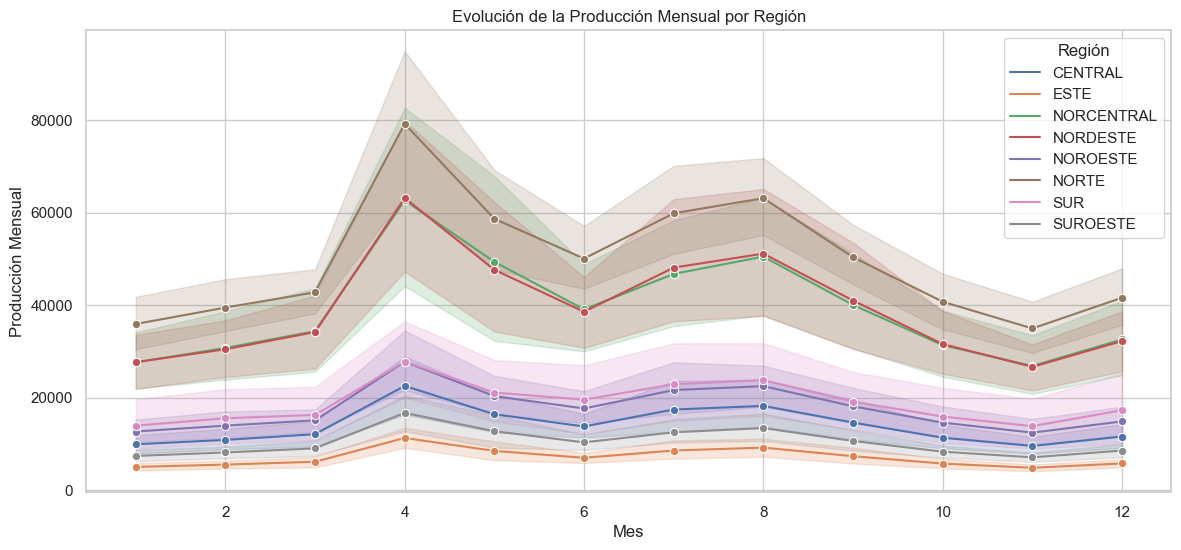

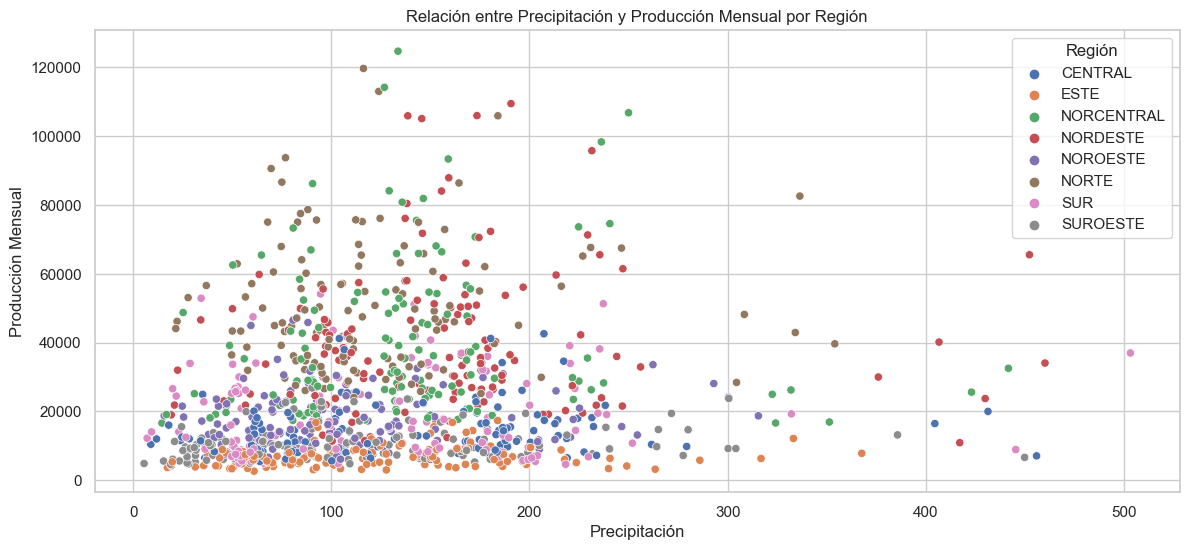

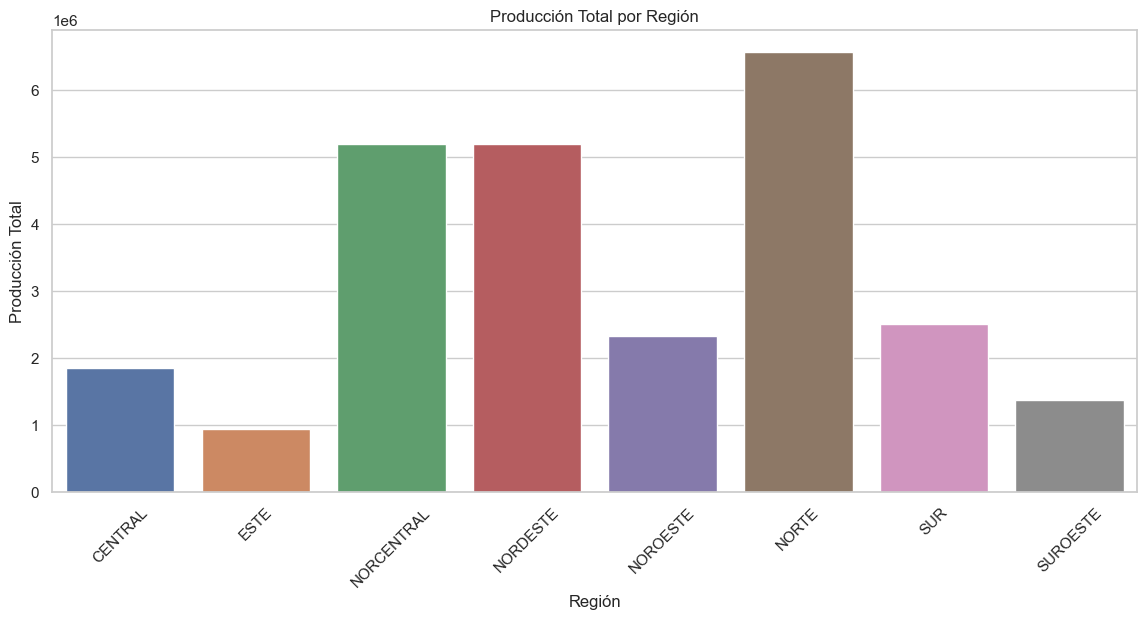

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


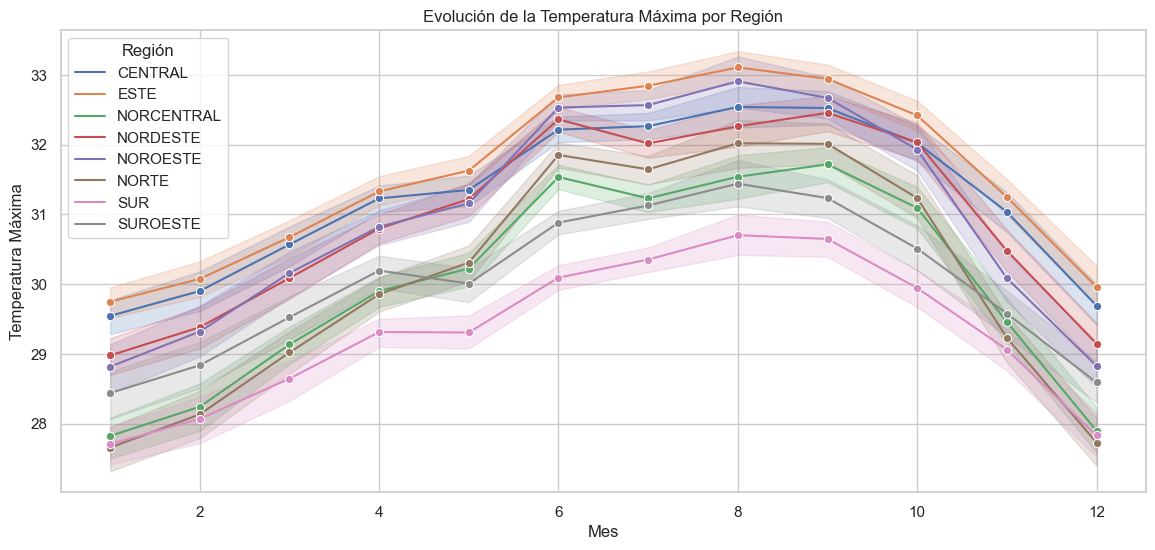

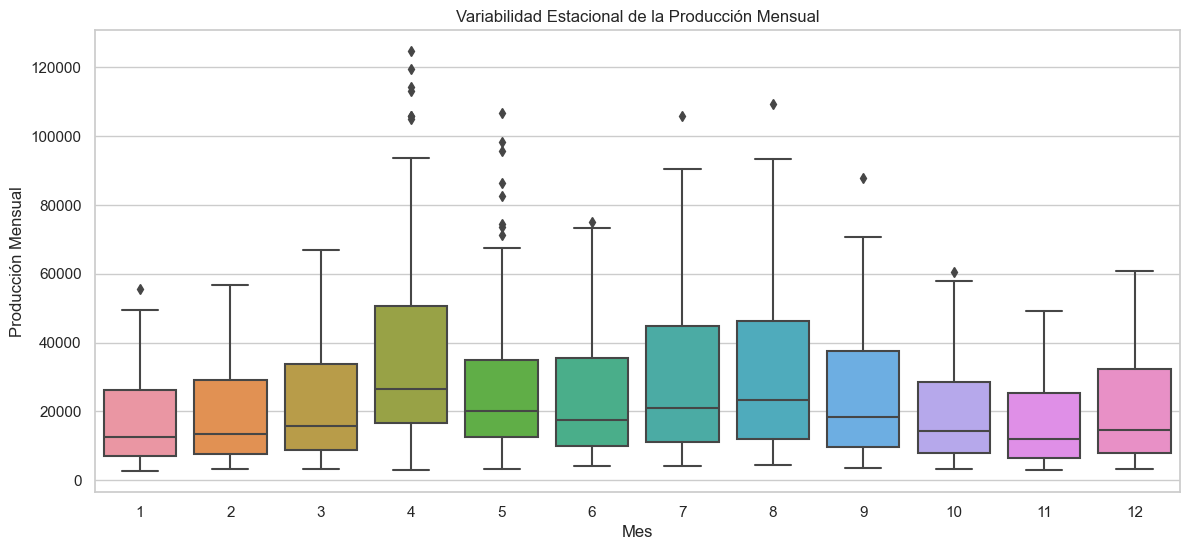

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# 1. Evolución Temporal de la Producción por Región
plt.figure(figsize=(14, 6))
sns.lineplot(data=datos_agrupados_numericos, x='month', y='produccion_mensual', hue='region', marker='o')
plt.title('Evolución de la Producción Mensual por Región')
plt.xlabel('Mes')
plt.ylabel('Producción Mensual')
plt.legend(title='Región')
plt.show()



# 3. Comparación de Regiones en Términos de Producción
produccion_total_por_region = datos_agrupados_numericos.groupby('region')['produccion_mensual'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=produccion_total_por_region, x='region', y='produccion_mensual')
plt.title('Producción Total por Región')
plt.xlabel('Región')
plt.ylabel('Producción Total')
plt.xticks(rotation=45)
plt.show()

# 4. Tendencias Climáticas a lo Largo del Tiempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=datos_agrupados_numericos, x='month', y='max_temp', hue='region', marker='o')
plt.title('Evolución de la Temperatura Máxima por Región')
plt.xlabel('Mes')
plt.ylabel('Temperatura Máxima')
plt.legend(title='Región')
plt.show()

# 5. Análisis de Variabilidad Estacional
plt.figure(figsize=(14, 6))
sns.boxplot(data=datos_agrupados_numericos, x='month', y='produccion_mensual')
plt.title('Variabilidad Estacional de la Producción Mensual')
plt.xlabel('Mes')
plt.ylabel('Producción Mensual')
plt.show()


In [85]:
### Relacion entre clima y produccion

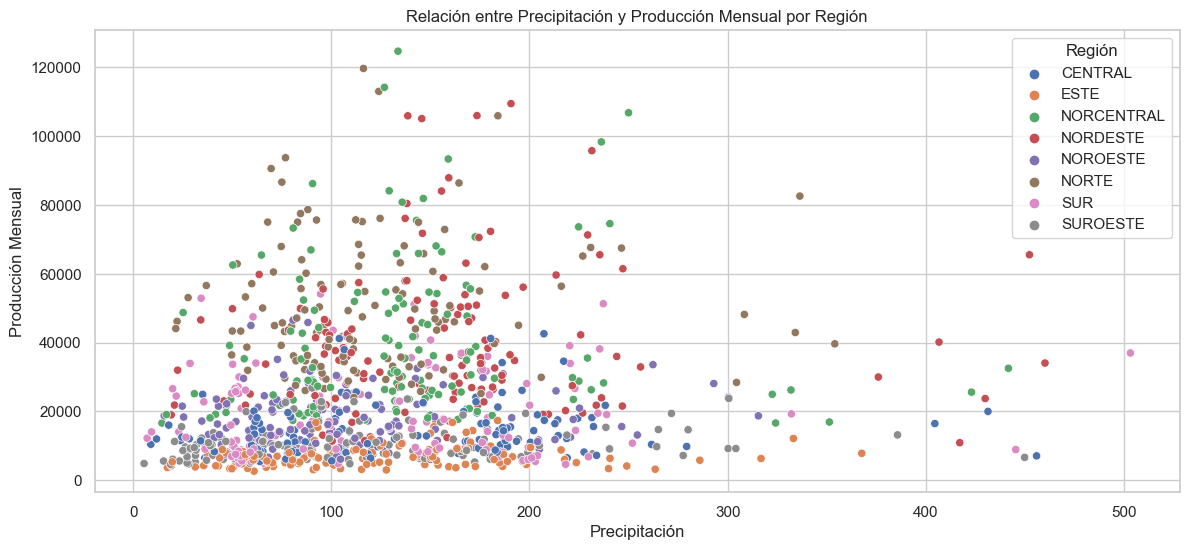

In [86]:
# Impacto de la precipitacion en la Producción
plt.figure(figsize=(14, 6))
sns.scatterplot(data=datos_agrupados_numericos, x='precipitation', y='produccion_mensual', hue='region')
plt.title('Relación entre Precipitación y Producción Mensual por Región')
plt.xlabel('Precipitación')
plt.ylabel('Producción Mensual')
plt.legend(title='Región')
plt.show()

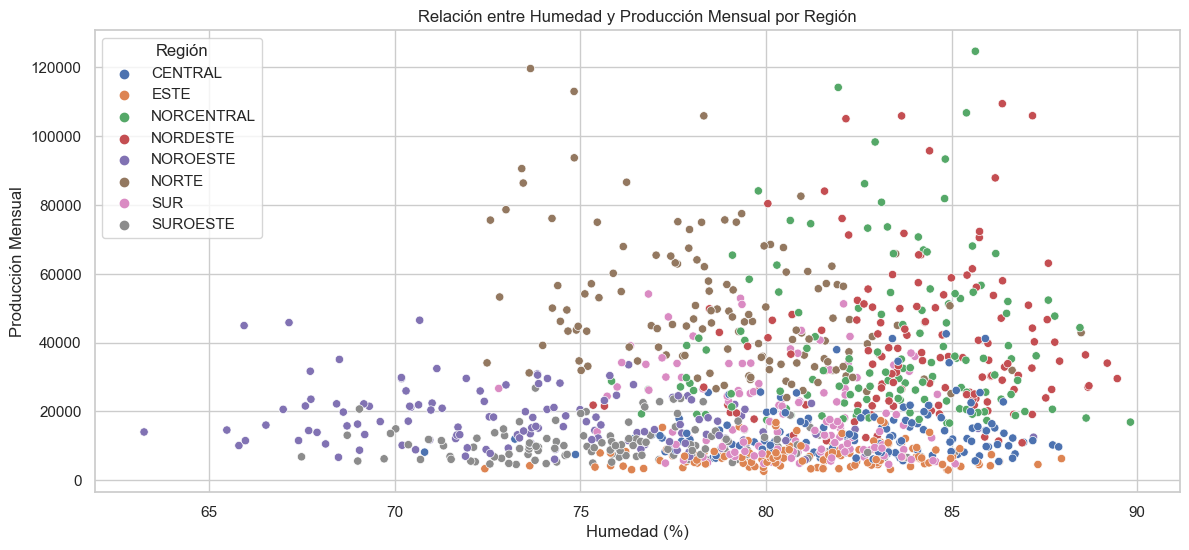

In [87]:
# Analizar la relación entre la humedad y la producción mensual
plt.figure(figsize=(14, 6))
sns.scatterplot(data=datos_agrupados_numericos, x='humidity', y='produccion_mensual', hue='region')
plt.title('Relación entre Humedad y Producción Mensual por Región')
plt.xlabel('Humedad (%)')
plt.ylabel('Producción Mensual')
plt.legend(title='Región')
plt.show()


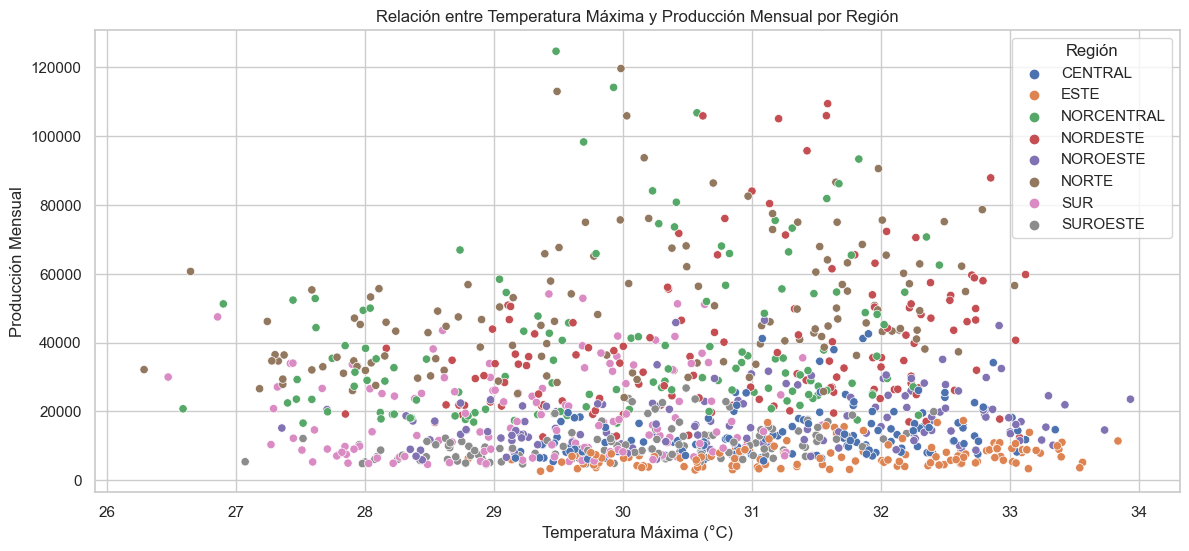

In [88]:
# Analizar la relación entre la temperatura máxima y la producción mensual
plt.figure(figsize=(14, 6))
sns.scatterplot(data=datos_agrupados_numericos, x='max_temp', y='produccion_mensual', hue='region')
plt.title('Relación entre Temperatura Máxima y Producción Mensual por Región')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Producción Mensual')
plt.legend(title='Región')
plt.show()


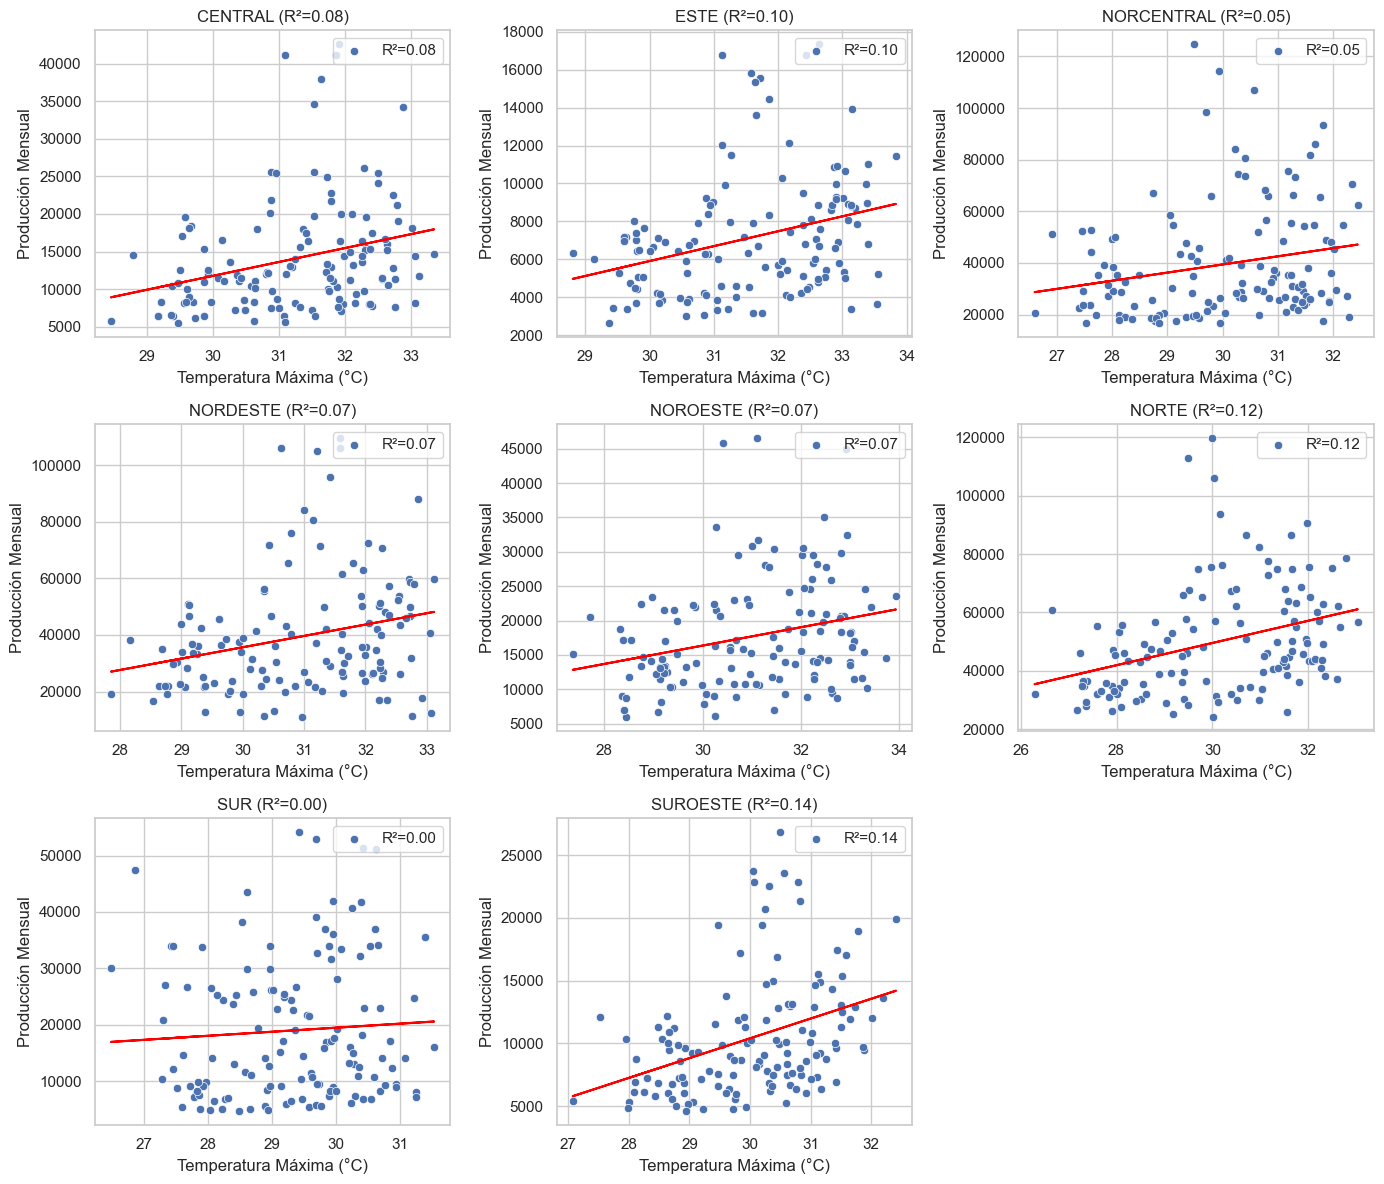

{'CENTRAL': 0.08041295493424272,
 'ESTE': 0.09575265788945919,
 'NORCENTRAL': 0.045062031888208565,
 'NORDESTE': 0.06513667633052067,
 'NOROESTE': 0.06804621455408899,
 'NORTE': 0.12028601856426102,
 'SUR': 0.004219407331461644,
 'SUROESTE': 0.13952650499086494}

In [100]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Crear un modelo de regresión lineal para cada región y calcular el coeficiente de determinación R²
regions = datos_agrupados_numericos['region'].unique()
r2_results = {}

plt.figure(figsize=(14, 12))

for i, region in enumerate(regions, 1):
    plt.subplot(3, 3, i)
    region_data = datos_agrupados_numericos[datos_agrupados_numericos['region'] == region]
    X = region_data['max_temp'].values.reshape(-1, 1)
    y = region_data['produccion_mensual'].values
    
    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    
    # Predecir y calcular R²
    y_pred = model.predict(X)
    r2 = model.score(X, y)
    r2_results[region] = r2
    
    # Graficar los datos y la línea de regresión
    sns.scatterplot(x=X.flatten(), y=y, label=f'R²={r2:.2f}')
    plt.plot(X, y_pred, color='red')
    plt.title(f'{region} (R²={r2:.2f})')
    plt.xlabel('Temperatura Máxima (°C)')
    plt.ylabel('Producción Mensual')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

r2_results


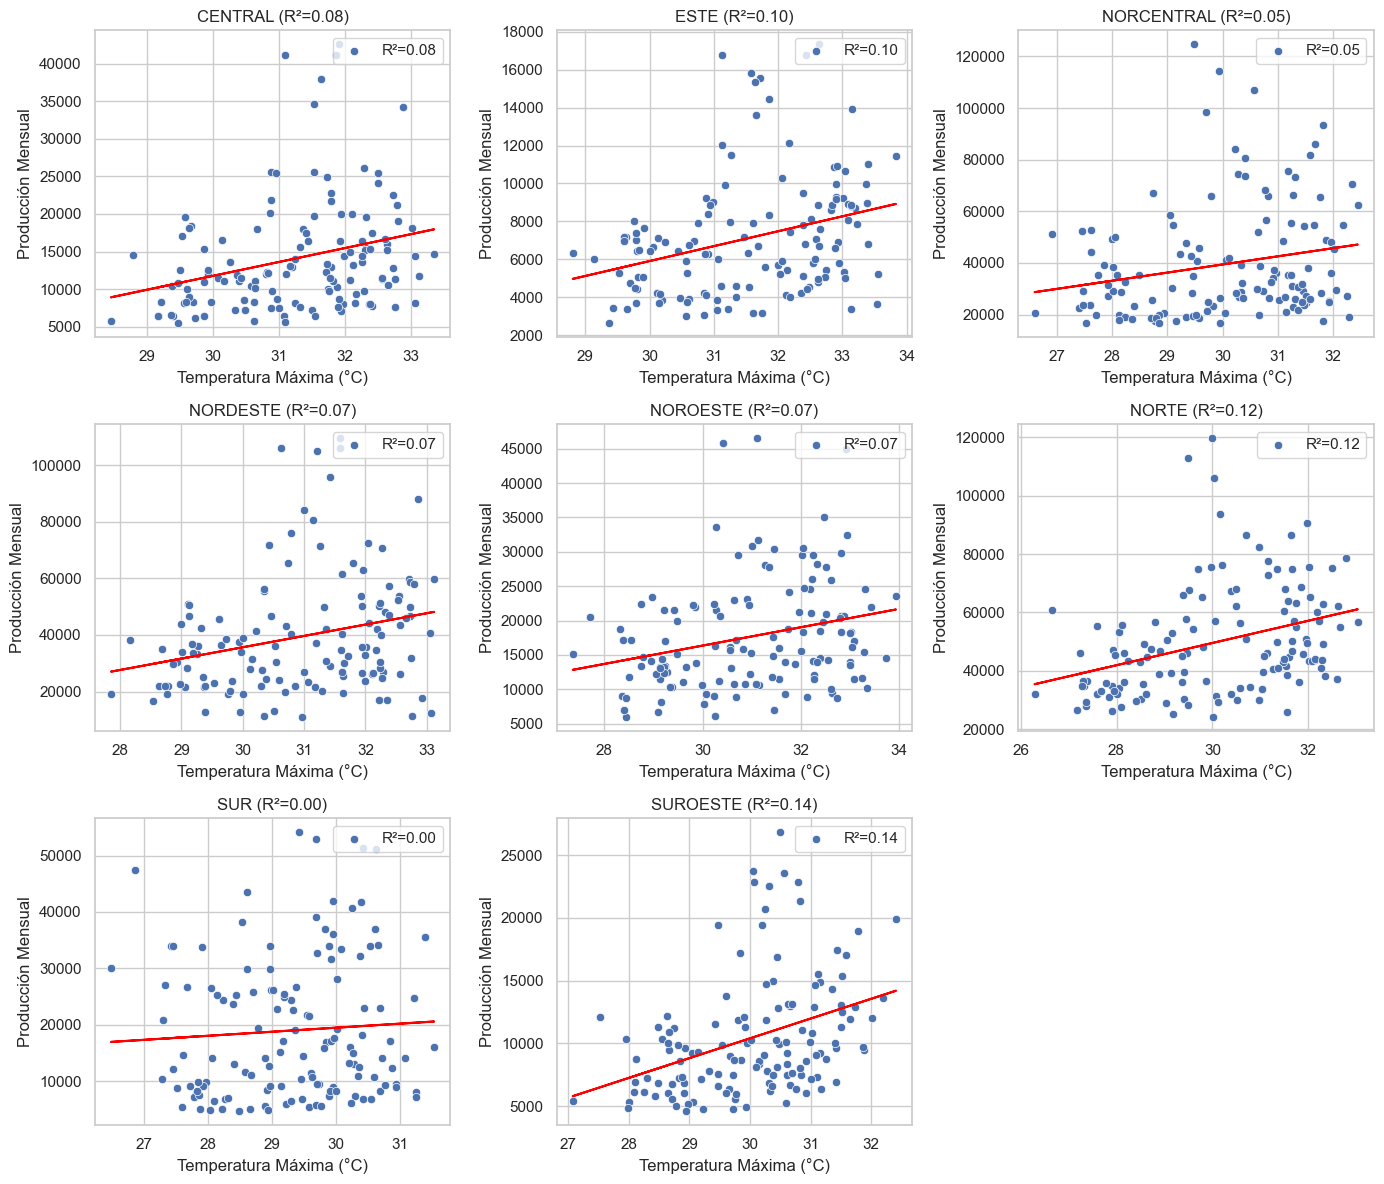

{'CENTRAL': 0.08041295493424272,
 'ESTE': 0.09575265788945919,
 'NORCENTRAL': 0.045062031888208565,
 'NORDESTE': 0.06513667633052067,
 'NOROESTE': 0.06804621455408899,
 'NORTE': 0.12028601856426102,
 'SUR': 0.004219407331461644,
 'SUROESTE': 0.13952650499086494}

In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reajustar los nombres de las columnas a minúsculas para el análisis
datos_agrupados_numericos.columns = datos_agrupados_numericos.columns.str.lower()

# Crear un modelo de regresión lineal para cada región y calcular el coeficiente de determinación R² para la producción
regions = datos_agrupados_numericos['region'].unique()
r2_results_produccion = {}

plt.figure(figsize=(14, 12))

for i, region in enumerate(regions, 1):
    plt.subplot(3, 3, i)
    region_data = datos_agrupados_numericos[datos_agrupados_numericos['region'] == region]
    X = region_data['max_temp'].values.reshape(-1, 1)
    y = region_data['produccion_mensual'].values
    
    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    
    # Predecir y calcular R²
    y_pred = model.predict(X)
    r2 = model.score(X, y)
    r2_results_produccion[region] = r2
    
    # Graficar los datos y la línea de regresión
    sns.scatterplot(x=X.flatten(), y=y, label=f'R²={r2:.2f}')
    plt.plot(X, y_pred, color='red')
    plt.title(f'{region} (R²={r2:.2f})')
    plt.xlabel('Temperatura Máxima (°C)')
    plt.ylabel('Producción Mensual')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

r2_results_produccion


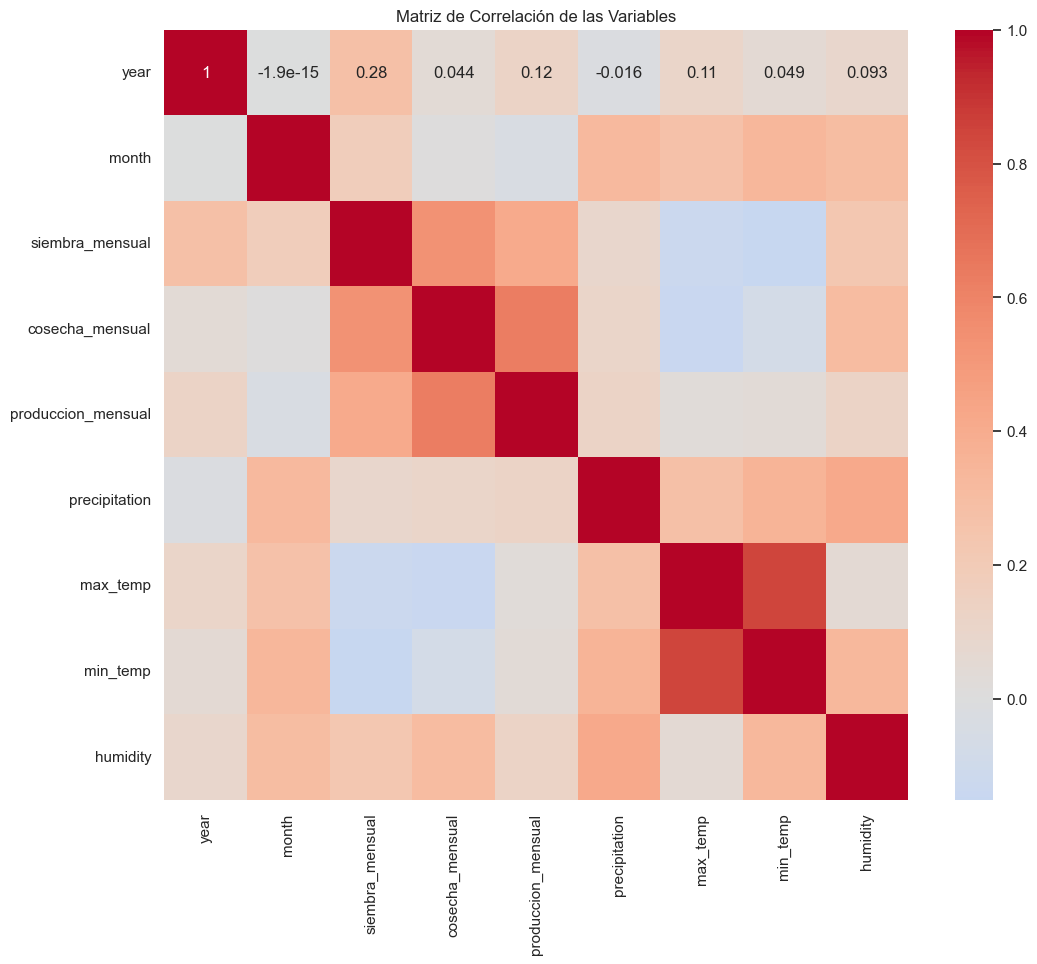

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las columnas son numéricas, eliminando cualquier dato no numérico si existe
datos_numericos = datos_agrupados_numericos.select_dtypes(include=[np.number])

# Crear la matriz de correlación
correlation_matrix = datos_numericos.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de las Variables')
plt.show()


### Calculo de rendimiento (variable objetivo)

In [96]:
# Añadir una nueva columna 'rendimiento' en el DataFrame que representa la producción (millares) por cosecha (tareas)
datos_agrupados_numericos['rendimiento'] = datos_agrupados_numericos['produccion_mensual'] / datos_agrupados_numericos['cosecha_mensual']

# Mostrar las primeras filas para verificar la nueva columna
datos_agrupados_numericos.head()

,year,month,region,siembra_mensual,cosecha_mensual,produccion_mensual,precipitation,max_temp,min_temp,humidity,rendimiento
0,2011,1,CENTRAL,2353.297,1957.817,6384.142,61.605,29.163,17.855,79.507,3.261
1,2011,1,ESTE,682.305,232.966,2627.770,61.016,29.362,18.896,79.940,11.280
2,2011,1,NORCENTRAL,4979.019,16988.213,22479.720,93.388,27.402,15.884,82.112,1.323
3,2011,1,NORDESTE,1751.939,12759.695,16821.318,110.430,28.543,18.330,81.780,1.318
4,2011,1,NOROESTE,1825.683,1474.398,9009.980,59.955,28.352,15.680,74.322,6.111


In [101]:
datos_agrupados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1056 non-null   int64  
 1   month               1056 non-null   int64  
 2   region              1056 non-null   object 
 3   siembra_mensual     1056 non-null   float64
 4   cosecha_mensual     1056 non-null   float64
 5   produccion_mensual  1056 non-null   float64
 6   precipitation       1056 non-null   float64
 7   max_temp            1056 non-null   float64
 8   min_temp            1056 non-null   float64
 9   humidity            1056 non-null   float64
 10  rendimiento         1056 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 90.9+ KB


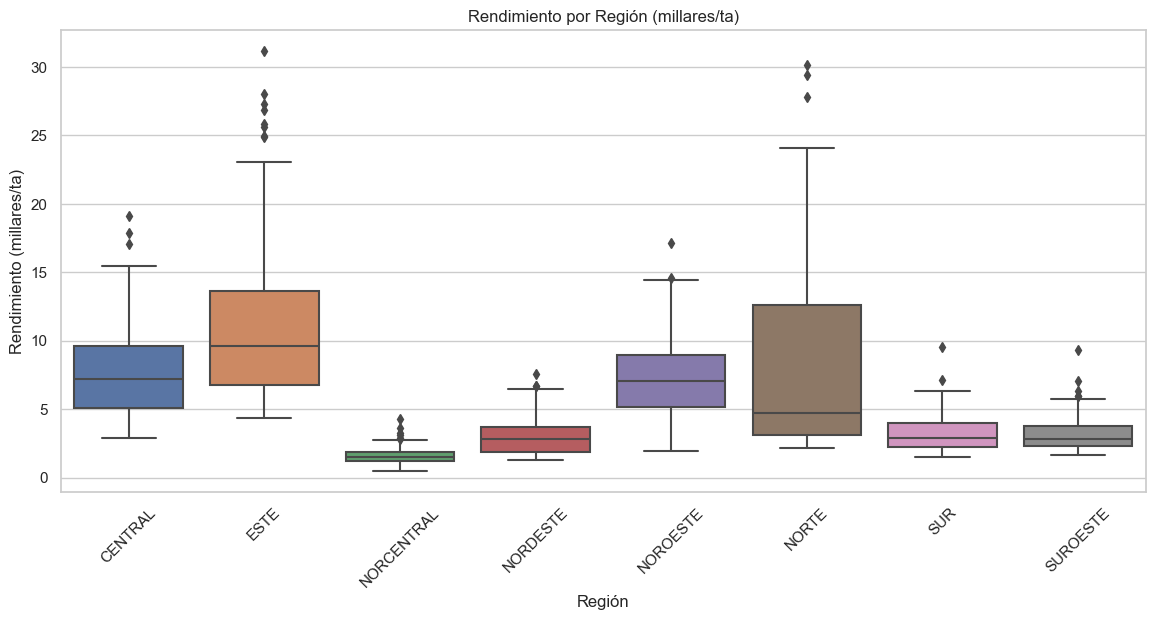

In [98]:
# Analizar el rendimiento por región
plt.figure(figsize=(14, 6))
sns.boxplot(data=datos_agrupados_numericos, x='region', y='rendimiento')
plt.title('Rendimiento por Región (millares/ta)')
plt.xlabel('Región')
plt.ylabel('Rendimiento (millares/ta)')
plt.xticks(rotation=45)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


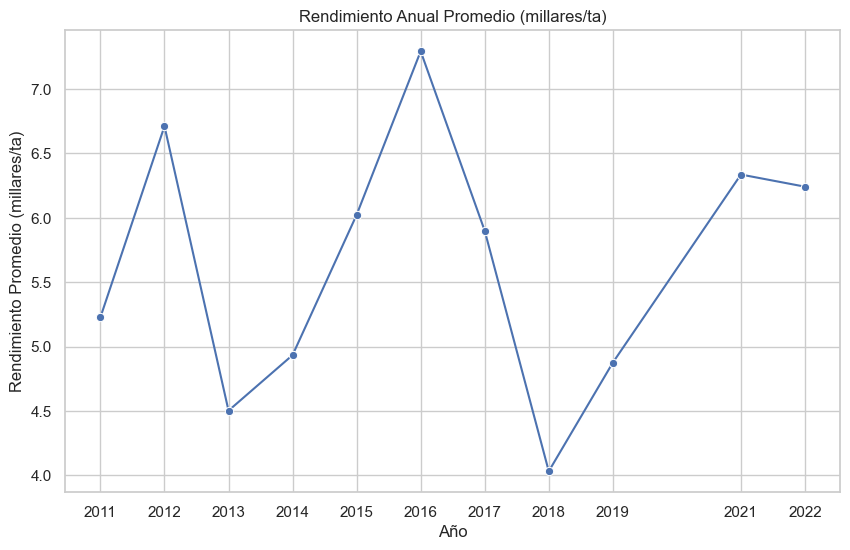

In [99]:
# Analizar el rendimiento anual
rendimiento_anual = datos_agrupados_numericos.groupby('year')['rendimiento'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=rendimiento_anual, x='year', y='rendimiento', marker='o')
plt.title('Rendimiento Anual Promedio (millares/ta)')
plt.xlabel('Año')
plt.ylabel('Rendimiento Promedio (millares/ta)')
plt.xticks(rendimiento_anual['year'])
plt.grid(True)
plt.show()


In [158]:
# Crear nuevas características
datos_agrupados_numericos['temp_diff'] = datos_agrupados_numericos['max_temp'] - datos_agrupados_numericos['min_temp']
datos_agrupados_numericos['precip_per_humidity'] = datos_agrupados_numericos['precipitation'] / datos_agrupados_numericos['humidity']
datos_agrupados_numericos['siembra_vs_cosecha'] = datos_agrupados_numericos['siembra_mensual'] / datos_agrupados_numericos['cosecha_mensual']
datos_agrupados_numericos['produccion_vs_siembra'] = datos_agrupados_numericos['produccion_mensual'] / datos_agrupados_numericos['siembra_mensual']
datos_agrupados_numericos['rendimiento_category'] = pd.cut(datos_agrupados_numericos['rendimiento'], bins=[0, 1, 2, 5, 10, 20, float('inf')], labels=['Muy Bajo', 'Bajo', 'Moderado', 'Alto', 'Muy Alto', 'Extremo'])

# Revisar las nuevas características
datos_agrupados_numericos.head()

,year,month,region,siembra_mensual,cosecha_mensual,produccion_mensual,precipitation,max_temp,min_temp,humidity,rendimiento,temp_diff,precip_per_humidity,siembra_vs_cosecha,produccion_vs_siembra,rendimiento_category
0,2011,1,CENTRAL,2353.297,1957.817,6384.142,61.605,29.163,17.855,79.507,3.261,11.308,0.775,1.202,2.713,Moderado
1,2011,1,ESTE,682.305,232.966,2627.770,61.016,29.362,18.896,79.940,11.280,10.466,0.763,2.929,3.851,Muy Alto
2,2011,1,NORCENTRAL,4979.019,16988.213,22479.720,93.388,27.402,15.884,82.112,1.323,11.518,1.137,0.293,4.515,Bajo
3,2011,1,NORDESTE,1751.939,12759.695,16821.318,110.430,28.543,18.330,81.780,1.318,10.213,1.350,0.137,9.602,Bajo
4,2011,1,NOROESTE,1825.683,1474.398,9009.980,59.955,28.352,15.680,74.322,6.111,12.672,0.807,1.238,4.935,Alto


## MODELADO Y PREDICCIONES

### Creación de Nuevas Características

In [186]:
# Crear nuevas características para una mayor generalizacion
datos_agrupados_numericos['temp_diff'] = datos_agrupados_numericos['max_temp'] - datos_agrupados_numericos['min_temp']
datos_agrupados_numericos['precip_per_humidity'] = datos_agrupados_numericos['precipitation'] / datos_agrupados_numericos['humidity']
datos_agrupados_numericos['siembra_vs_cosecha'] = datos_agrupados_numericos['siembra_mensual'] / datos_agrupados_numericos['cosecha_mensual']
datos_agrupados_numericos['produccion_vs_siembra'] = datos_agrupados_numericos['produccion_mensual'] / datos_agrupados_numericos['siembra_mensual']
datos_agrupados_numericos['rendimiento_category'] = pd.cut(datos_agrupados_numericos['rendimiento'], bins=[0, 1, 2, 5, 10, 20, float('inf')], labels=['Muy Bajo', 'Bajo', 'Moderado', 'Alto', 'Muy Alto', 'Extremo'])

# Revisar las nuevas características
datos_agrupados_numericos.head()

,year,month,region,siembra_mensual,cosecha_mensual,produccion_mensual,precipitation,max_temp,min_temp,humidity,rendimiento,temp_diff,precip_per_humidity,siembra_vs_cosecha,produccion_vs_siembra,rendimiento_category
0,2011,1,CENTRAL,2353.297,1957.817,6384.142,61.605,29.163,17.855,79.507,3.261,11.308,0.775,1.202,2.713,Moderado
1,2011,1,ESTE,682.305,232.966,2627.770,61.016,29.362,18.896,79.940,11.280,10.466,0.763,2.929,3.851,Muy Alto
2,2011,1,NORCENTRAL,4979.019,16988.213,22479.720,93.388,27.402,15.884,82.112,1.323,11.518,1.137,0.293,4.515,Bajo
3,2011,1,NORDESTE,1751.939,12759.695,16821.318,110.430,28.543,18.330,81.780,1.318,10.213,1.350,0.137,9.602,Bajo
4,2011,1,NOROESTE,1825.683,1474.398,9009.980,59.955,28.352,15.680,74.322,6.111,12.672,0.807,1.238,4.935,Alto


### Preparación del Modelo y Conjunto de Datos

In [187]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selección de características (variables independientes) y la variable objetivo
X = datos_agrupados_numericos[['year', 'month', 'region', 'siembra_mensual', 'cosecha_mensual', 
                               'precipitation', 'max_temp', 'min_temp', 'humidity', 'temp_diff', 
                               'precip_per_humidity', 'siembra_vs_cosecha', 'produccion_vs_siembra']]
y = datos_agrupados_numericos['rendimiento']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las características numéricas y categóricas
numeric_features = ['year', 'month', 'siembra_mensual', 'cosecha_mensual', 
                    'precipitation', 'max_temp', 'min_temp', 'humidity',
                    'temp_diff', 'precip_per_humidity', 'siembra_vs_cosecha', 'produccion_vs_siembra']
categorical_features = ['region']

# Crear transformador de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Mejor configuración de hiperparámetros para Gradient Boosting Regressor
best_params_gbr = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_leaf': 6,
    'min_samples_split': 20,
    'n_estimators': 300,
    'subsample': 0.8,
    'random_state': 42
}

# Crear el modelo Gradient Boosting Regressor con los mejores parámetros
gbr_model = GradientBoostingRegressor(**best_params_gbr)

# Crear pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', gbr_model)])

# Entrenar el pipeline en el conjunto de datos de entrenamiento
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'month',
                                                   'siembra_mensual',
                                                   'cosecha_mensual',
                                                   'precipitation', 'max_temp',
                                                   'min_temp', 'humidity',
                                                   'temp_diff',
                                                   'precip_per_humidity',
                                                   'siembra_vs_cosecha',
                                                   'produccion_vs_siembra']),
                                                 ('cat', OneHotEncoder(),
                                                  ['region'])])),
                ('model',
                 GradientBoostingRegressor(min_samples_leaf=6,
                                           min_samples_split=20,
                                           n_estimators=300, random_state=42,
                                           subsample=0.8))])

### Evaluación del Modelo

In [188]:
# Evaluar el pipeline en el conjunto de datos de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Mostrar las transformaciones preparadas y conjuntos de datos
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
print(f"Transformations: {X_train_transformed.shape}")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Mean Squared Error (MSE): 0.46889508912482425
Mean Absolute Error (MAE): 0.3906257089719947
R^2 Score: 0.9740838043309175
Transformations: (844, 20)
Train shape: (844, 13), Test shape: (212, 13), y_train shape: (844,), y_test shape: (212,)


### Validación Cruzada

In [179]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Configurar KFold para validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada y obtener puntuaciones de R^2
cv_r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2', n_jobs=-1)
cv_mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Convertir MSE negativo a positivo
cv_mse_scores = -cv_mse_scores

# Calcular métricas promedio
mean_r2 = np.mean(cv_r2_scores)
std_r2 = np.std(cv_r2_scores)
mean_mse = np.mean(cv_mse_scores)
std_mse = np.std(cv_mse_scores)

print(f"Cross-Validation R^2 Score: {mean_r2:.4f} ± {std_r2:.4f}")
print(f"Cross-Validation MSE: {mean_mse:.4f} ± {std_mse:.4f}")


Cross-Validation R^2 Score: 0.9738 ± 0.0065
Cross-Validation MSE: 0.5931 ± 0.1758


### Visualizaciones

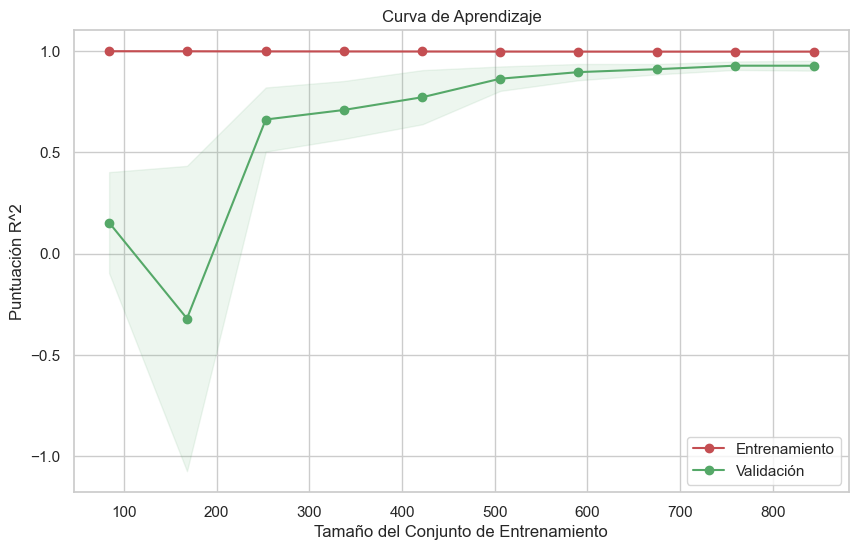

In [180]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Definir el tamaño de los conjuntos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y la desviación estándar de los errores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotear la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validación')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación R^2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


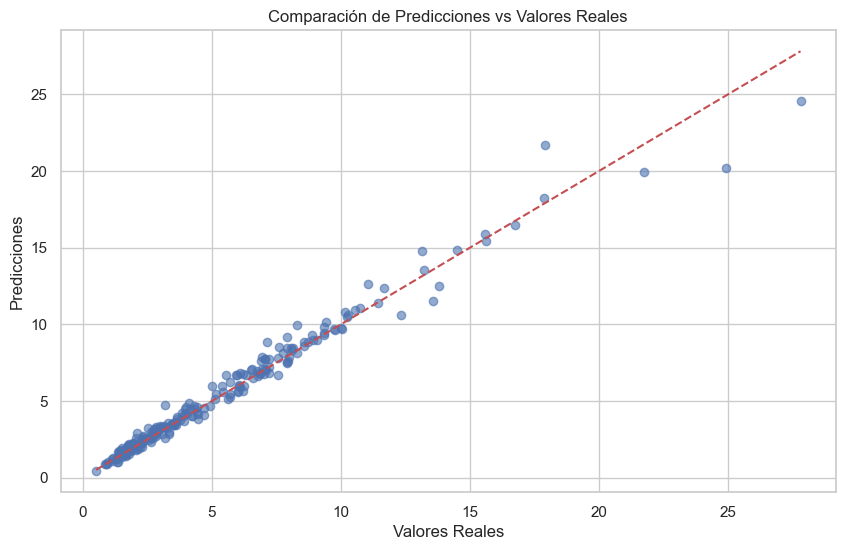

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


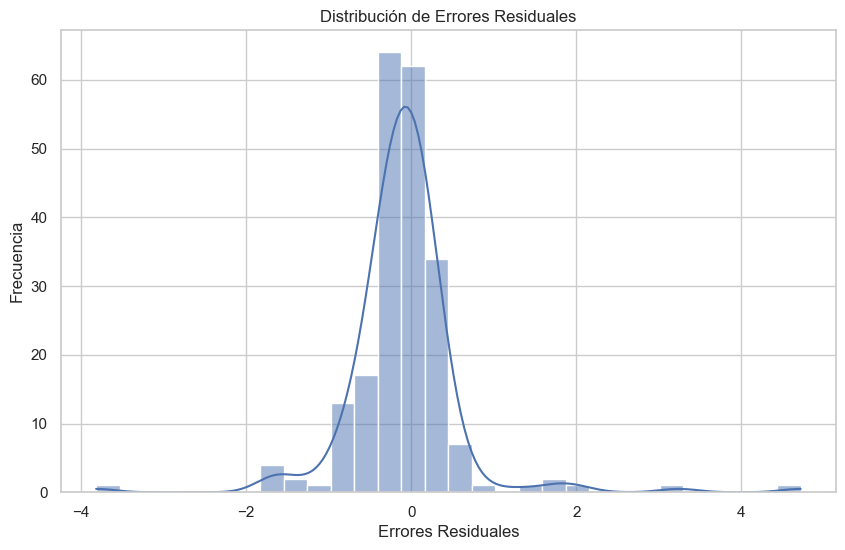

In [182]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Histograma de los errores residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Errores Residuales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores Residuales')
plt.grid(True)
plt.show()


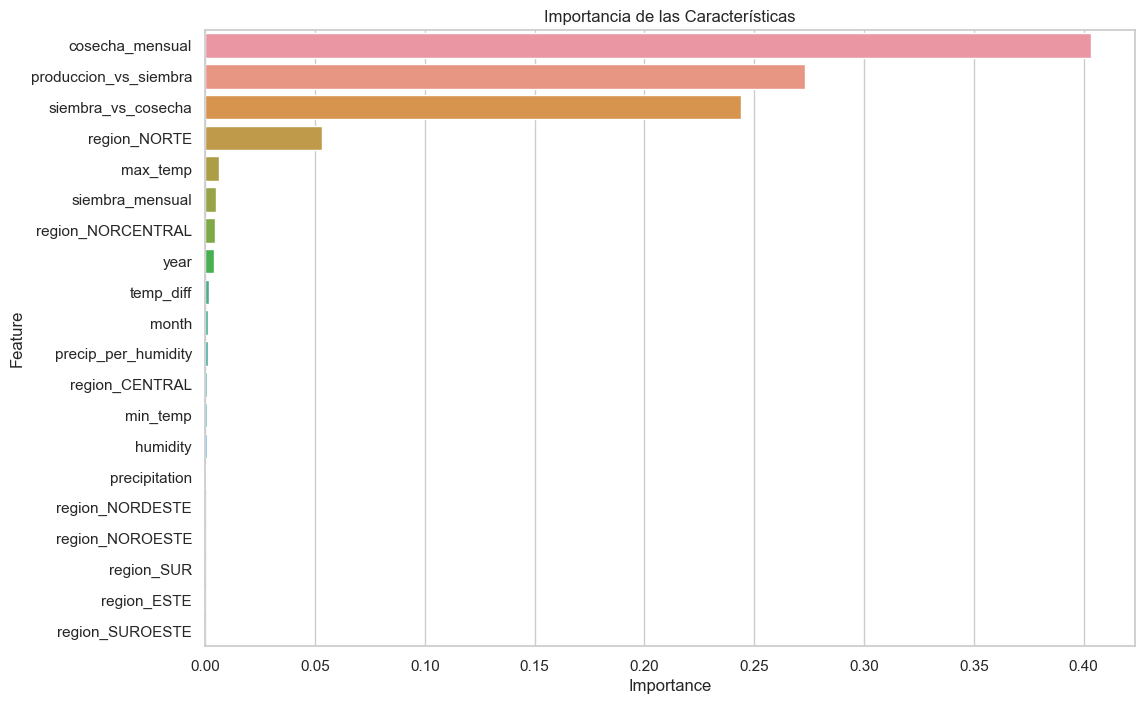

In [189]:
importances = gbr_model.feature_importances_
features = numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Crear un DataFrame para ordenar las importancias
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Gráfico de barras de la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características')
plt.show()
